In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("WorldCupMatches.csv")
df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total Goals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


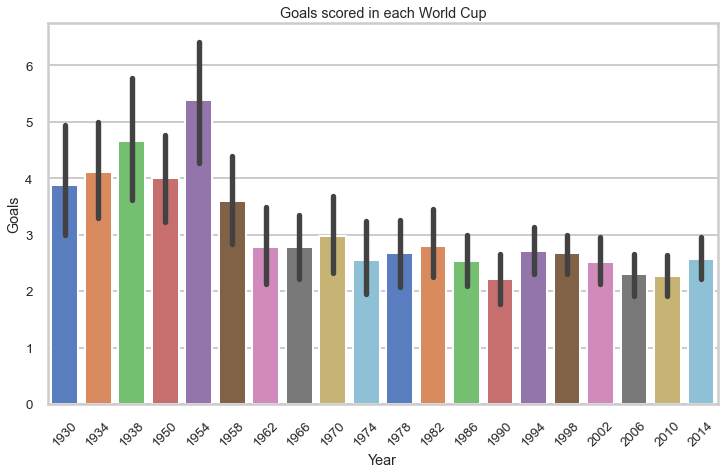

In [3]:
sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.6)

f, ax = plt.subplots(figsize = (12,7))

sns.barplot(data=df, x='Year', y='Total Goals', palette='muted')

ax.set_ylabel("Goals")
ax.set_title("Goals scored in each World Cup")
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [4]:
df1 = df[['Year', 'Home Team Goals', 'Away Team Goals']]

df_allgoals = pd.melt(df1, id_vars=['Year']).sort_values(['variable','value'])

df_allgoals.rename(columns={'variable': 'Goal', 'value': 'Count'}, inplace=True)

df_allgoals.sort_values('Goal', ascending=False, inplace=True)

df_allgoals

,Year,Goal,Count
109,1958,Home Team Goals,0
460,1990,Home Team Goals,1
457,1990,Home Team Goals,1
455,1990,Home Team Goals,1
454,1990,Home Team Goals,1
...,...,...,...
1527,2006,Away Team Goals,1
1524,2006,Away Team Goals,1
1521,2006,Away Team Goals,1
1517,2006,Away Team Goals,1


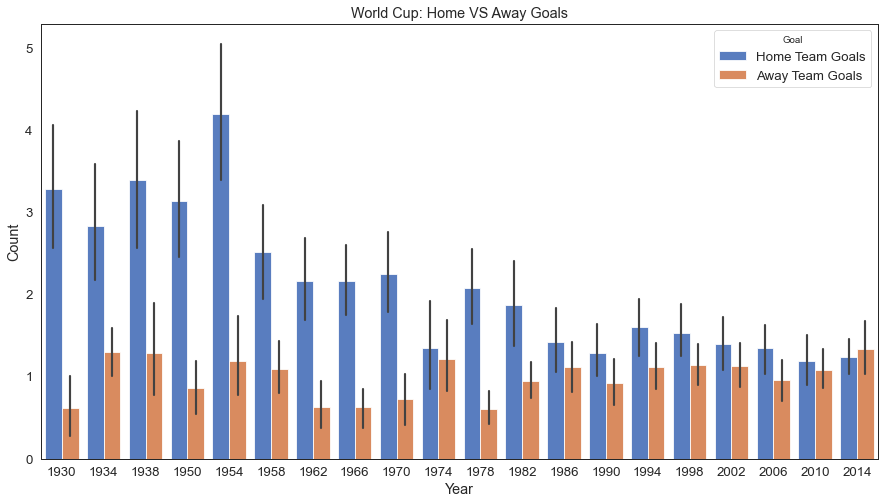

In [5]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

f, ax = plt.subplots(figsize = (15,8))

sns.barplot(data=df_allgoals, x='Year', y='Count', hue='Goal', palette='muted')

ax.set_title("World Cup: Home VS Away Goals")

plt.show()

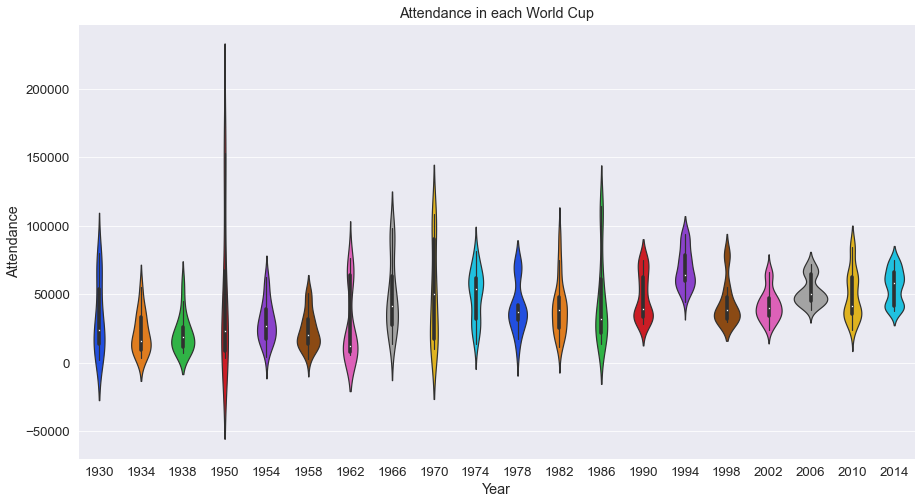

In [6]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5)

f, ax = plt.subplots(figsize = (15,8))

sns.violinplot(data=df, x="Year", y="Attendance", palette="bright")

ax.set_title("Attendance in each World Cup")

plt.show()

In [7]:
df_1930 = df[df.Year == 1930]
df_2014 = df[df.Year == 2014]

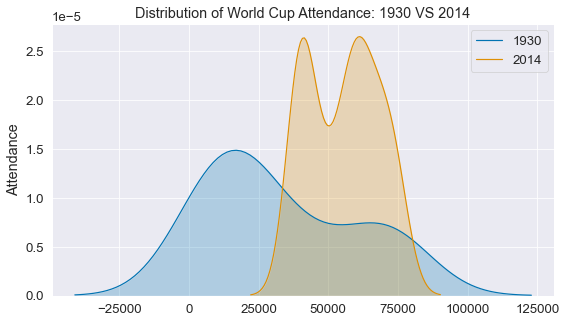

In [8]:
sns.set_style("darkgrid")
sns.set_palette("colorblind")

f, ax = plt.subplots(figsize = (9,5))

sns.kdeplot(df_1930['Attendance'], shade=True, label='1930')
sns.kdeplot(df_2014['Attendance'], shade=True, label='2014')

ax.set_ylabel("Attendance")
ax.set_title("Distribution of World Cup Attendance: 1930 VS 2014")

plt.show()

In [9]:
df_goals = pd.read_csv("goals.csv")
df_goals.head()

,goals,home/away,year
0,4,home,1930
1,3,home,1930
2,2,home,1930
3,3,home,1930
4,1,home,1930


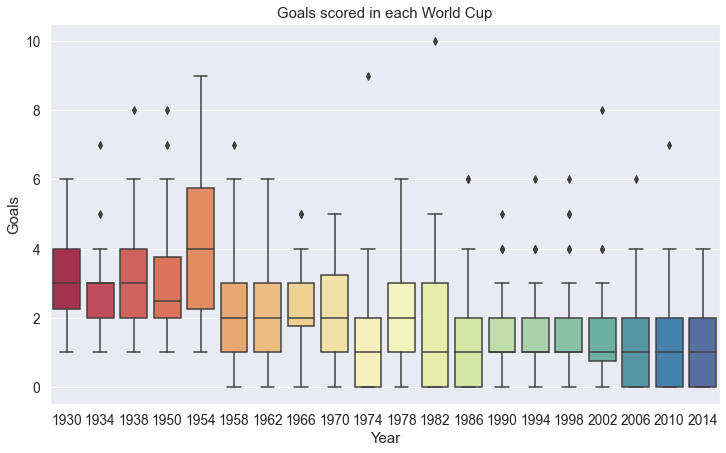

In [10]:
sns.set_context("notebook", font_scale=1.25)

f, ax2 = plt.subplots(figsize = (12,7))

ax2 = sns.boxplot(data=df_goals, x="year", y="goals", palette="Spectral")
ax2.set_xlabel("Year")
ax2.set_ylabel("Goals")
ax2.set_title("Goals scored in each World Cup")

plt.show()